1. 시대별 얼마나 흔한 이름
2. 이름 상대 순위
3. 각 연도별 인기 이름
4. 가장 많이 증가/감소 이름
5. 이름 유행 분석 
    * 글자단위, 모음 자음
    * 유명인 이름 유행 분석 
6. ssa.gov
    * 미국 영어 이름 데이터

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_dir = "/Users/yoon/OneDrive/workspace/datasets/babynames/yob1880.txt"
names_1880 = pd.read_csv(file_dir, names=['name', 'sex', 'births'])

In [3]:
names_1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


## 그룹화 연산
`DataFrame.groupby()`
* 성별 기준 그룹화: 성별을 기준으로 태어난 아이들의 수를 그룹화

`FROM DataFrame SELECT column(s) AGGREGATE option(s)`

In [4]:
names_1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [5]:
file_name = "/Users/yoon/OneDrive/workspace/datasets/babynames/yob{}.txt"

pieces = []
for year in range(1880, 2011):
    df = pd.read_csv(file_name.format(year), names=["name", "sex", "births"])
    df['year'] = year
    pieces.append(df)

In [6]:
baby_names = pd.concat(pieces, ignore_index=True)

In [7]:
baby_names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [8]:
baby_names.pivot_table('births', aggfunc=sum, index="year", columns='sex')

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
...,...,...
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310


In [9]:
#year, sex 그룹화

def add_prop(group):
    # 1880년에 태어난 이름별 여자아이 수 / 1880년에 태어난 전체 여자 아이의 수
    group['prop'] = group.births / group.births.sum()
    return group
    
names = baby_names.groupby(['year', 'sex']).apply(add_prop)

In [74]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [10]:
names['prop']

0          0.077643
1          0.028618
2          0.022013
3          0.021309
4          0.019188
             ...   
1690779    0.000003
1690780    0.000003
1690781    0.000003
1690782    0.000003
1690783    0.000003
Name: prop, Length: 1690784, dtype: float64

## 연도별/성별에 따른 선호하는 이름 1000개씩 추출

In [11]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000] 
    

top1000_names = names.groupby(["year", "sex"]).apply(get_top1000)
top1000_names.reset_index(inplace=True, drop=True)
top1000_names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


## 이름 유행 분석

In [12]:
top1000_names['sex'] # equivalent-> top1000_names.sex 

0         F
1         F
2         F
3         F
4         F
         ..
261872    M
261873    M
261874    M
261875    M
261876    M
Name: sex, Length: 261877, dtype: object

In [13]:
conditions = [top1000_names['sex'] == 'M', top1000_names['sex'] == 'F']

males = top1000_names[conditions[0]] # equivalent-> top1000_names.loc[condition, :]
females = top1000_names[conditions[1]]

### pivoting

* 각 연도별로 상위 1000개의 이름을 추출 했을 때 총 6868개의 이름이 존재

In [14]:
top1000_names.pivot_table("births", index="year", 
                          columns="name", 
                          aggfunc=sum)

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
total_births = top1000_names.pivot_table("births", index="year", 
                                         columns="name", 
                                         aggfunc=sum)

In [16]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


<AxesSubplot:xlabel='year'>

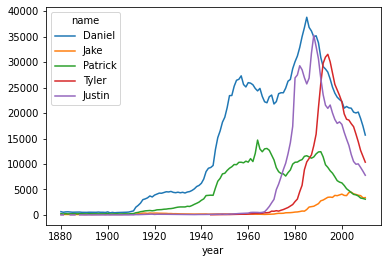

In [17]:
subset = total_births[['Daniel', 'Jake', 'Patrick', 'Tyler', 'Justin']]
subset.plot()

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

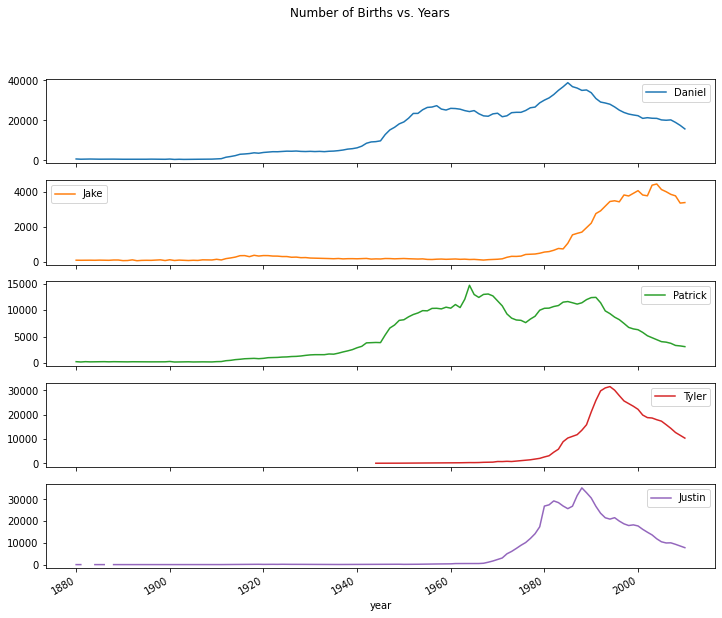

In [18]:
subset.plot(subplots=True, figsize=(12, 10), title="Number of Births vs. Years") # figsize unit: 72px   -> width: 12 * 72px height: 10 * 72px

### 연도별 / 성별 top 1000 이름이 전체 출생수에서 차지하는 비율 출력
* 과거에 비해서 이름이 다양하다

<AxesSubplot:xlabel='year'>

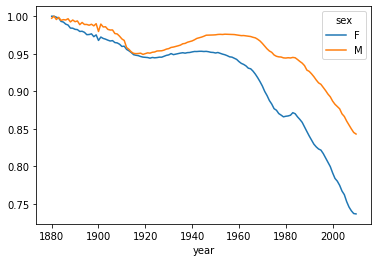

In [19]:
table = top1000_names.pivot_table("prop", index="year", columns="sex", aggfunc=sum)
table.plot()

### 누적합

In [20]:
df = males[males['year'] == 2010]
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: prop, Length: 1000, dtype: float64

In [21]:
# NumPy Array
prop_cumsum.values

array([0.01152297, 0.02093414, 0.0299592 , 0.03892999, 0.04781651,
       0.05657871, 0.06515496, 0.0734141 , 0.08152785, 0.08962106,
       0.09764789, 0.10540608, 0.11285189, 0.12027558, 0.12767241,
       0.13502288, 0.14236755, 0.14960266, 0.15682671, 0.16402073,
       0.17072223, 0.17719089, 0.18345201, 0.18965519, 0.19581465,
       0.2018324 , 0.20776851, 0.21357767, 0.21935364, 0.22507009,
       0.23057741, 0.23605576, 0.24151251, 0.24696821, 0.25239072,
       0.25747663, 0.26250776, 0.26753783, 0.27241251, 0.27717762,
       0.28179576, 0.28638704, 0.29085031, 0.29530516, 0.29975263,
       0.30404892, 0.30833468, 0.31260199, 0.31681137, 0.32091592,
       0.32494882, 0.32897594, 0.33294458, 0.33688004, 0.3407644 ,
       0.34463822, 0.34849361, 0.3523274 , 0.35615751, 0.35991702,
       0.36365547, 0.36736863, 0.37107073, 0.3746738 , 0.37809039,
       0.38146011, 0.38479453, 0.38812526, 0.39140226, 0.3945207 ,
       0.39752379, 0.40042626, 0.40320231, 0.40597309, 0.40872

In [22]:
idx = prop_cumsum.values.searchsorted(0.5)
prop_cumsum.iloc[idx]

0.5006516075268308

In [23]:
df.iloc[:117]

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
260989,Miguel,M,3433,2010,0.001808
260990,Giovanni,M,3419,2010,0.001801
260991,Timothy,M,3404,2010,0.001793
260992,Jake,M,3402,2010,0.001792


### 1900년도 데이터에 대해서 누적합을 구했을 때, 50%를 초과하는 지점까지의 이름과 갯수를 출력

In [66]:
df = males[males['year'] == 1900]
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [67]:
idx = prop_cumsum.values.searchsorted(0.5)
top50_prop = df.iloc[:idx + 1].reset_index(drop=True)

In [68]:
top50_prop

,name,sex,births,year,prop
0,John,M,9834,1900,0.065319
1,William,M,8580,1900,0.056990
2,James,M,7246,1900,0.048129
3,George,M,5405,1900,0.035901
4,Charles,M,4102,1900,0.027246
5,Robert,M,3827,1900,0.025419
6,Joseph,M,3714,1900,0.024669
7,Frank,M,3477,1900,0.023095
8,Edward,M,2723,1900,0.018087
9,Henry,M,2606,1900,0.017309


In [27]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000_names.groupby(['year', 'sex']).apply(get_quantile_count)
diversity

year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [28]:
diversity.unstack('sex')

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
...,...,...
2006,209,99
2007,223,103
2008,234,109


<AxesSubplot:xlabel='year'>

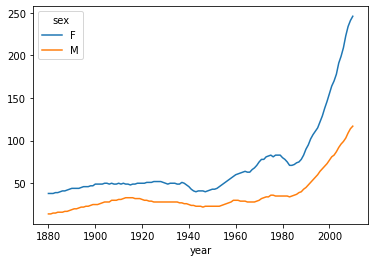

In [29]:
diversity.unstack('sex').plot()

## 이름 마지막 글자의 변화

In [30]:
# name열의 값에 대해 마지막 글자만 출력
names.name.str[-1]

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: name, Length: 1690784, dtype: object

### Map 함수
`map(func, iter)`

In [31]:
def twoTimes(data):
    return data * 2

x = [1, 2, 3, 4]
x = list(map(twoTimes, x))

In [32]:
last_letters = names.name.map(lambda x : x[-1])
last_letters.name = "last_letter"

In [75]:
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [33]:
names.pivot_table("births",
                 index=last_letters,
                 columns=['sex','year'],
                 aggfunc=sum)

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [43]:
table = names.pivot_table("births",
                 index=last_letters,
                 columns=['sex','year'],
                 aggfunc=sum)

subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [44]:
subtable

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

In [46]:
subtable.sum() # 각 열의 합

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [57]:
# 각 열의 값마다 각열의 총합으로 나누어 비율을 계산
letter_prob = subtable / subtable.sum() 

In [59]:
letter_prob.multiply(100)

sex                  F                                M                      
year              1910       1960       2010       1910       1960       2010
last_letter                                                                  
a            27.338957  34.185252  38.124002   0.503095   0.244023   1.498013
b                  NaN   0.034321   0.025583   0.211640   0.183439   2.046954
c             0.001261   0.002423   0.053780   0.248200   0.725691   1.218143
d             1.702757   0.184416   0.148208  11.385802  12.290794   2.338728
e            33.694150  21.513336  17.841456  14.755559   8.385258   6.795893
f                  NaN   0.000989   0.005514   0.078271   0.432526   0.118785
g             0.014379   0.015727   0.037351   0.225028   0.948847   0.140435
h             5.152920   3.622391   7.585176   4.556175   3.790746   5.167032
i             0.152617   3.996514   3.173376   0.084450   0.060302   2.262769
j                  NaN        NaN   0.009039        NaN        NaN   0.076855
k             0.012108   0.015578   0.035588   3.658122   4.938366   1.854105
l             4.318948   3.386741   2.635573   6.501612  10.490353   7.036676
m             0.120076   0.861348   0.258782   5.804385   3.382697   2.465679
n             7.923999  13.068739  14.021012  14.341548  15.252172  36.277051
o             0.165987   0.243909   0.124331   1.706506   1.282854   4.268108
p             0.001766   0.002324   0.001990   0.317202   0.567480   0.126898
q                  NaN        NaN   0.003013        NaN        NaN   0.018015
r             1.338997   0.676389   1.802548   6.448058   3.103412   8.747660
s             3.904232   1.276420   1.333193  13.081494  10.272964   6.514495
t             2.743835   1.520131   0.782997   7.287923   6.565497   2.286052
u             0.068363   0.057417   0.041728   0.012359   0.005721   0.122104
v                  NaN   0.006033   0.011654   0.011329   0.003658   0.143438
w             0.002018   0.003116   0.118248   0.632859   0.771082   1.614849
x             0.001514   0.003660   0.072711   0.396503   0.185080   0.861365
y            11.097181  15.256901  11.682765   7.734889  16.098656   5.816796
z             0.243936   0.065923   0.070380   0.016993   0.018381   0.183103